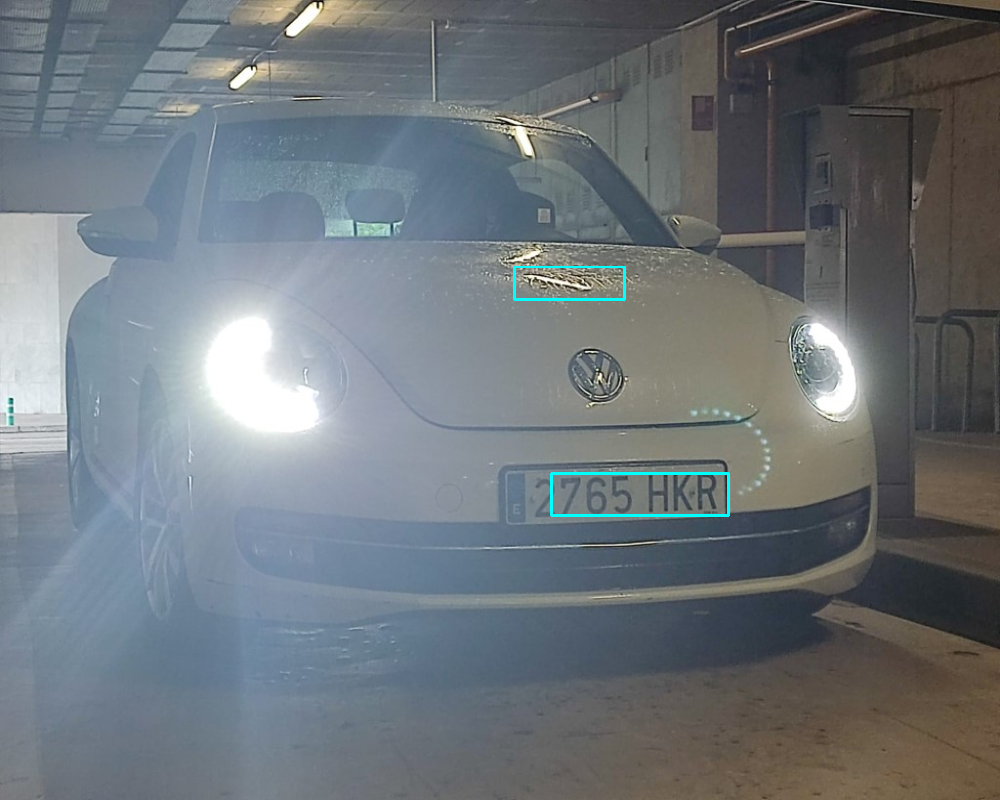

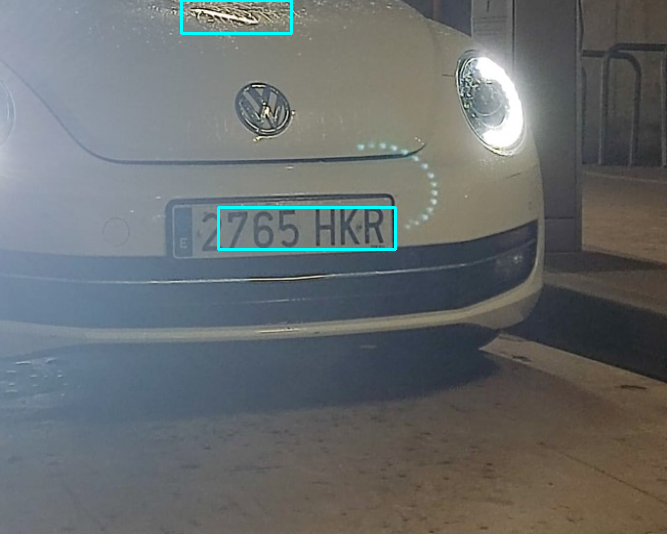

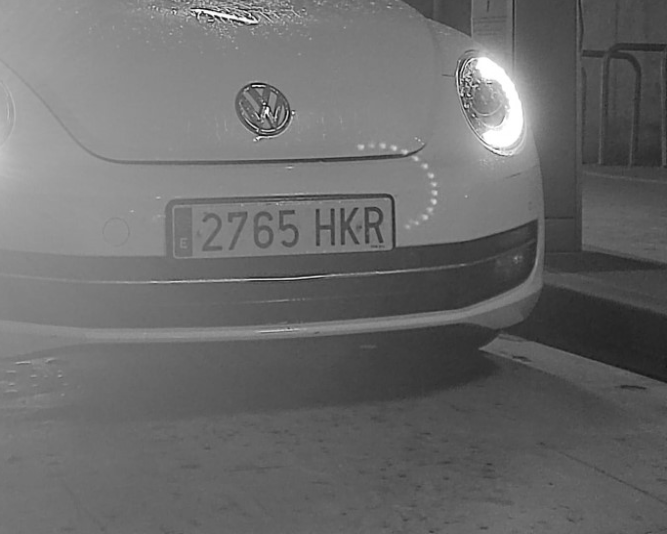

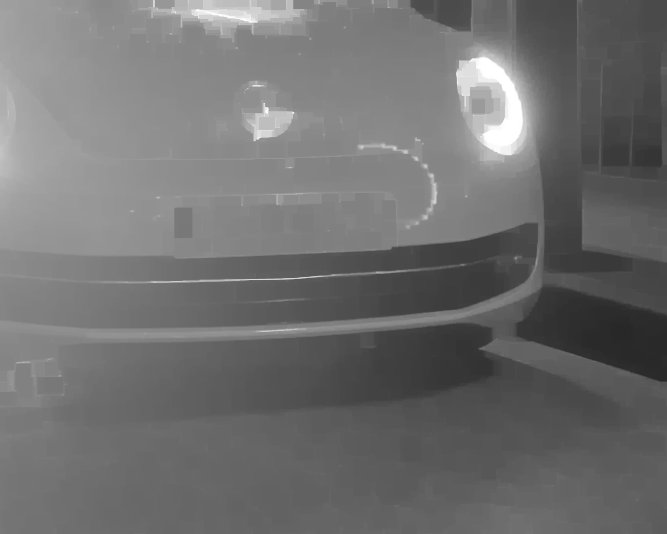

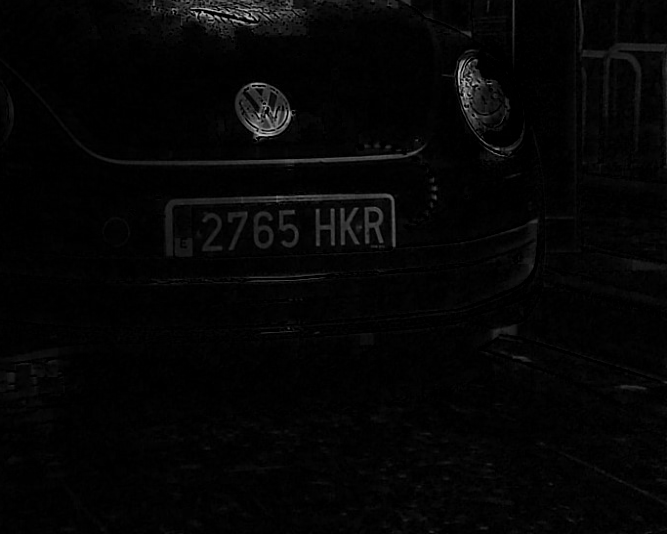

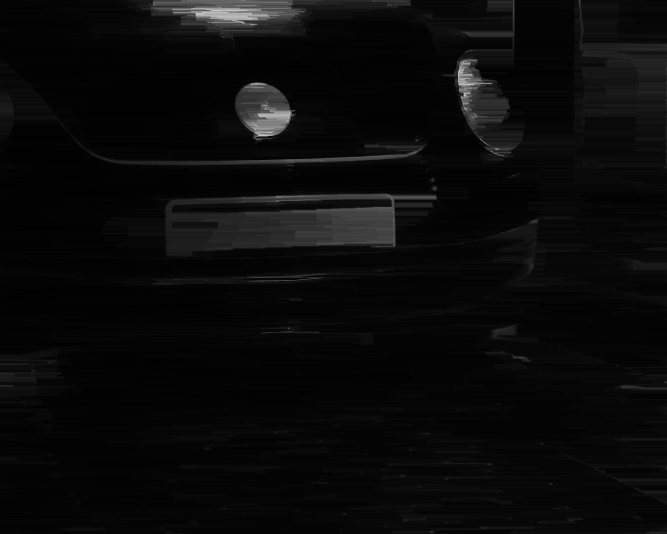

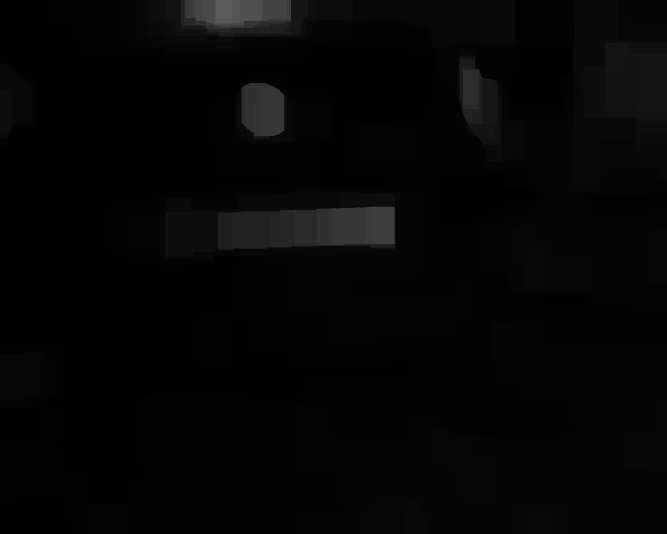

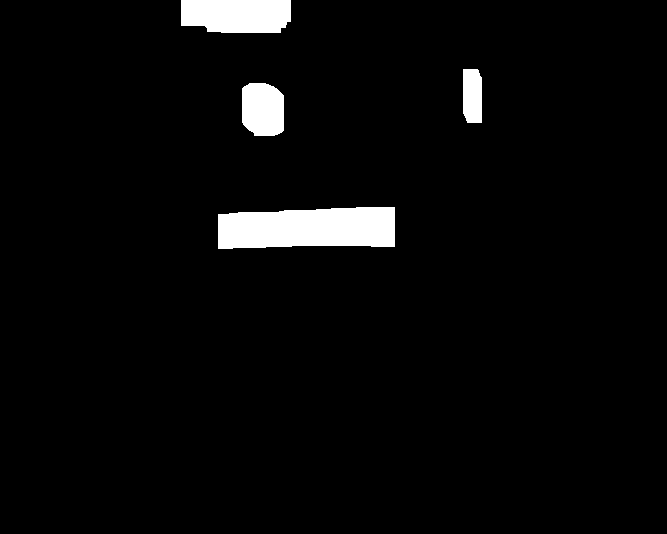

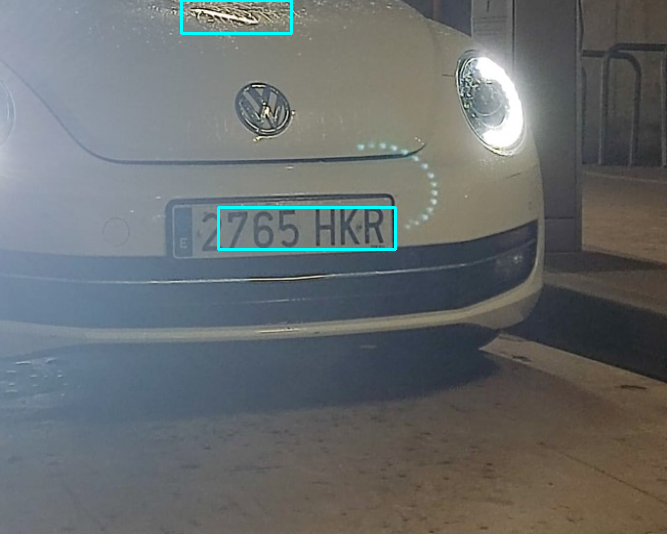

(218, 207, 177, 42)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
#import imutils

def detect_plate(image_path):

    # Llegim la imatge
    image_o = cv2.imread(image_path)
    image_o = cv2.resize(image_o, (1000, 800))
    y,x,_ = image_o.shape
    image = image_o[int(1/3*y):, int(1/3*x):]

    # Passem la imatge a escala de grisos (?)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Fem un closing -> dilatar + erosionar
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    closed_image = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations = 2)

    # Fem la operació morfològica de "Black Hat" ->  difference between the closing and the given image
    blackHat_image = closed_image - gray

    # Fem closing a la imatge resultant del "Black Hat"
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (45, 1))
    closed_image2 = cv2.morphologyEx(blackHat_image, cv2.MORPH_CLOSE, kernel, iterations = 1)

    # Fem opening -> erosionar + dilatar
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 35))
    open_image = cv2.morphologyEx(closed_image2, cv2.MORPH_OPEN, kernel, iterations = 1)
    hist1 = np.histogram(open_image.flatten())


    # Binaritzem la imatge mitjançant la operació de thresholding (definim un threshold de 80)
    _, binary_image = cv2.threshold(open_image, 30, 255, cv2.THRESH_BINARY)

    # Erosionem i dilatem per eliminar elements/soroll de la imatge binaritzada
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    rem_elem_image = cv2.erode(binary_image, kernel, iterations=3)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    eroded_image = cv2.dilate(rem_elem_image, kernel, iterations=3)

    # De la imatge resultant obtenim el elements (per segmentar la licence plate) amb l'algoritme de Connected Component Labeling
    totalLabels, labelsInfo, stats, centroids = cv2.connectedComponentsWithStats(eroded_image, 8, cv2.CV_32S)

    # Iterem per tots els elemnts trobats i ens quedem amb la bbox de la licence plate
    # AIXÒ S'HA D'ARREGLAR PERQUÈ HO FACI BÉ!!!!!! (LA PART DE LA CONDICIÓ PRINCIPALMENT)
    for label in range(1, totalLabels):
        x, y, w, h, _ = stats[label]
        if 2 < w/h < 5:
            # Dibuixem un bbox a la imatge i guardem la info de les coordenades
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)  # (0, 255, 0) is the color of the rectangle (green), 2 is the line thickness
            x_roi, y_roi, w_roi, h_roi = x, y, w, h



    cv2_imshow(image_o)
    cv2.waitKey(0)

    cv2_imshow(image)
    cv2.waitKey(0)

    cv2_imshow(gray)
    cv2.waitKey(0)

    cv2_imshow(closed_image)
    cv2.waitKey(0)

    cv2_imshow(blackHat_image)
    cv2.waitKey(0)

    cv2_imshow(closed_image2)
    cv2.waitKey(0)

    cv2_imshow(open_image)
    cv2.waitKey(0)

    cv2_imshow(binary_image)
    cv2.waitKey(0)

    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return x_roi, y_roi, w_roi, h_roi


print(detect_plate(r"/content/cotxe5.jpg"))

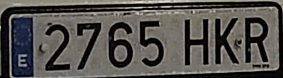

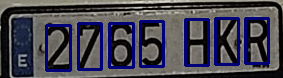

[(185, 19, 23, 46),
 (215, 18, 23, 46),
 (245, 18, 23, 45),
 (140, 21, 23, 45),
 (78, 23, 23, 46),
 (109, 23, 24, 44),
 (46, 25, 24, 45)]

In [ ]:
import cv2

def segmentChars(roi):

    # Passem la imatge a gris
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Fem "Black hat"
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
    closed_roi = cv2.morphologyEx(roi_gray, cv2.MORPH_CLOSE, kernel, iterations = 5)
    blackHat_roi = closed_roi - roi_gray

    # Binaritzem la imatge amb thresholding
    _, binary_roi = cv2.threshold(blackHat_roi, 120, 255, cv2.THRESH_BINARY)

    # Trobem els elements a segmentar
    totalLabels_roi, labelsInfo_roi, stats_roi, centroids_roo = cv2.connectedComponentsWithStats(binary_roi, 8, cv2.CV_32S)

    letters_bboxes = []
    for label in range(1, totalLabels_roi):
        x, y, w, h, _ = stats_roi[label]
        if h > 15 and w > 15 and (w < roi.shape[1]/3):
            cv2.rectangle(roi, (x, y), (x + w, y + h), (120, 0, 0), 2)
            letters_bboxes.append((x,y,w,h))

    cv2_imshow(roi)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return letters_bboxes

path_org = r"/content/bpk2.jpeg"
img_org = cv2.imread(path_org)
image = cv2.resize(img_org, (1000, 800))
y,x,_ = image.shape
image = image[int(1/3*y):, int(1/3*x):]
x_roi, y_roi, w_roi, h_roi = (201, 161, 283, 78)
roi = image[y_roi:y_roi+h_roi, x_roi:x_roi+w_roi]

cv2_imshow(roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

segmentChars(roi)

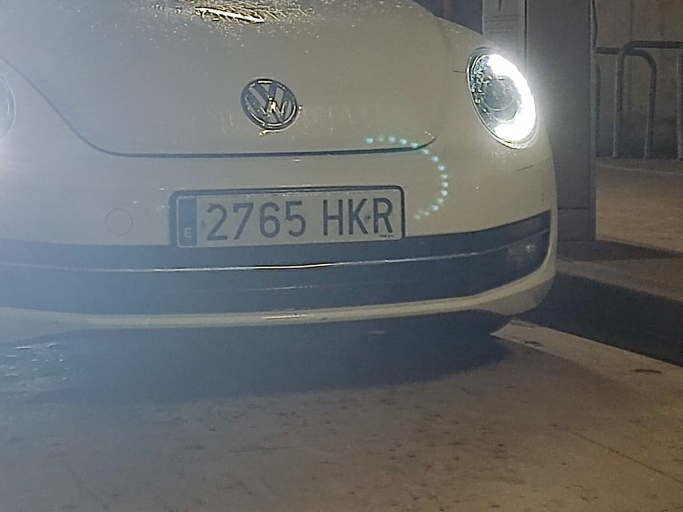

-1

In [ ]:
img = cv2.imread(r"/content/cotxe5.jpg")
y,x,_ = img.shape
crop_img = img[int(1/3*y):, int(1/3*x):]
cv2_imshow(crop_img)
cv2.waitKey(0)